#PROYEK ANALISIS DATA : [PRSA_Data_Wanliu_20130301-20170228]


Nama : Nurrisa Qurrotul Aini
Email : nurrisaaini9@gmail.com
ID Dicoding : MC227D5X2154

# Menentukan Pertanyaan Bisnis

1. Bagaimana tren tahunan dari kadar PM2.5 di stasiun Wanliu?
2. Apakah ada hubungan antara suhu (TEMP) dan kadar PM2.5?

# Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Konfigurasi tampilan grafik
sns.set(style="whitegrid")

# Membaca dataset
data_air = pd.read_csv ('/content/PRSA_Data_Wanliu_20130301-20170228.csv')
print(data_air)

# Menampilkan informasi awal dataset
data_air.info()


          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0   
1          2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0   
2          3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0   
3          4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN   
4          5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   11.0  27.0  4.0  20.0  300.0  81.0   
35060  35061  2017      2   28    20   15.0  43.0  6.0  55.0  500.0  45.0   
35061  35062  2017      2   28    21   13.0  35.0  7.0  48.0  500.0  48.0   
35062  35063  2017      2   28    22   12.0  31.0  5.0  47.0  500.0  50.0   
35063  35064  2017      2   28    23    7.0  25.0  6.0  86.0  700.0  11.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.7  1023.0 -1

#Data Wrangling

#Gathering Data

In [ ]:
# Mengambil hanya kolom yang relevan untuk analisis
df_gathered = data_air[["No", "year", "PM2.5"]]

# Mengelompokkan berdasarkan tahun untuk melihat tren tahunan
annual_pm25 = df_gathered.groupby("year")["PM2.5"].mean().reset_index()

# Menampilkan hasil setelah data gathering
print(annual_pm25)


   year      PM2.5
0  2013  91.595658
1  2014  89.475182
2  2015  80.538314
3  2016  71.421726
4  2017  94.189557


**Insight :**
1. Penurunan Konsentrasi PM2.5 dari 2013 ke 2016
Rata-rata PM2.5 turun secara bertahap
*   Rata-rata PM2.5 turun secara bertahap dari 91.60 µg/m³ (2013) → 71.42 µg/m³ (2016).
*  Hal ini menunjukkan adanya perbaikan dalam kualitas udara, yang bisa diakibatkan karena kebijakan lingkungan, pengurangan emisi industri, atau faktor cuaca.
2. Kenaikan Kembali pada 2017
*   Setelah mengalami penurunan selama 4 tahun berturut-turut, PM2.5 tiba-tiba naik drastis pada 2017 menjadi 94.19 µg/m³.
*   Hal ini dapat disebabkan oleh faktor tertentu seperti musim dingin yang ekstrem, peningkatan emisi, atau perubahan kebijakan lingkungan.
3. Fluktuasi & Faktor Eksternal
*   Meskipun terdapat penurunan dari 2013 ke 2016, namun tidak ada pola penurunan yang konsisten setiap tahunnya, sehingga perlu dicek apakah ada faktor musiman atau kebijakan tertentu yang mempengaruhi kualitas udara.


# Ascending Data

In [ ]:
# Mengurutkan data berdasarkan rata-rata PM2.5 dari yang terendah ke tertinggi
annual_pm25_sorted = annual_pm25.sort_values(by="PM2.5", ascending=True)

# Menampilkan hasil
print(annual_pm25_sorted)


   year      PM2.5
3  2016  71.421726
2  2015  80.538314
1  2014  89.475182
0  2013  91.595658
4  2017  94.189557


**Insight :**

*   Polusi Terendah terjadi pada Tahun 2016 yang memiliki PM2.5 terendah (71.42 µg/m³), hal ini menunjukkan perbaikan kualitas udara.
*   Penurunan Konsisten terjadi Dari 2013 ke 2016, PM2.5 terus turun, hal ini terjadi karena kebijakan lingkungan atau faktor cuaca.
*   Lonjakan di 2017, Setelah turun 4 tahun, PM2.5 naik lagi ke 94.19 µg/m³, kemungkinan karena perubahan kebijakan atau peningkatan emisi.




# Cleaning Data

In [ ]:
# 1. Cek Missing Values
print("Missing Values:\n", data_air.isnull().sum())

# 2. Mengisi nilai NaN pada PM2.5 dengan median
data_air["PM2.5"].fillna(data_air["PM2.5"].median(), inplace=True)

# 3. Cek Duplikasi
print("\nJumlah Data Duplikat:", data_air.duplicated().sum())

# 4. Hapus Data Duplikat jika ada
data_air.drop_duplicates(inplace=True)

# 5. Cek kembali informasi dataset setelah cleaning
data_air.info()


Missing Values:
 No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

Jumlah Data Duplikat: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35

<ipython-input-20-75ad37a6154b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_air["PM2.5"].fillna(data_air["PM2.5"].median(), inplace=True)


**Insight :**
* Banyak data hilang di PM2.5 (382), PM10, SO2, NO2, CO, O3, bisa mempengaruhi analisis.
* Data aman, tidak ada duplikasi dan tidak perlu pembersihan tambahan.
* Kolom "wd" (Wind Direction) Kosong, Bisa diisi dengan modus (nilai yang paling sering muncul).

#Exploratory Data Analisis (EDA)

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  34780.000000  34489.000000  33994.000000  33252.000000   
mean      83.109169    110.464618     18.376481     65.258789   1319.353513   
std       81.497468     92.795065     22.609648    

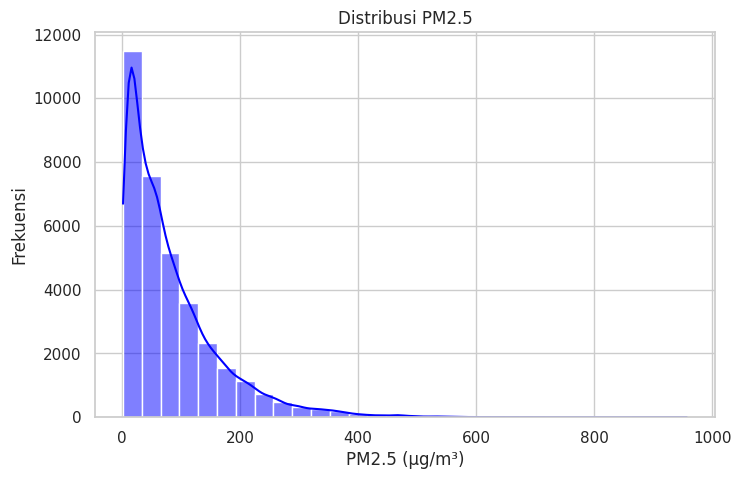

<ipython-input-21-7ab003756fc1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_air["month"], y=data_air["PM2.5"], palette="Blues")


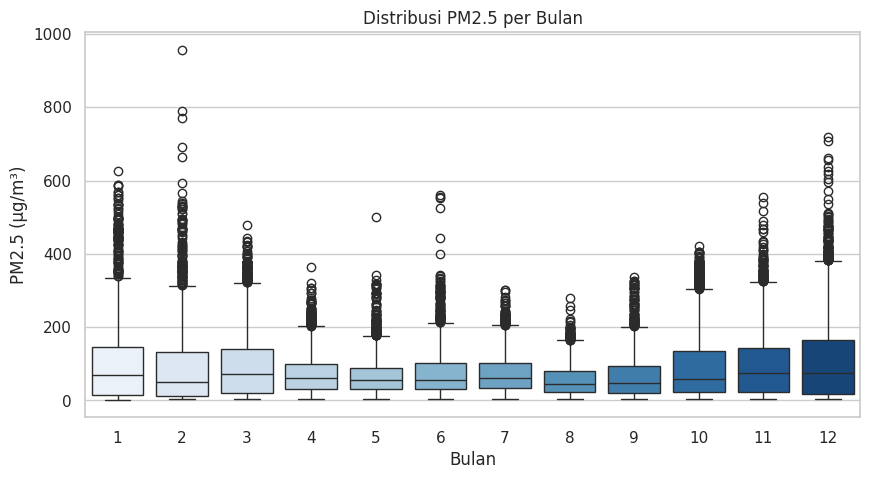

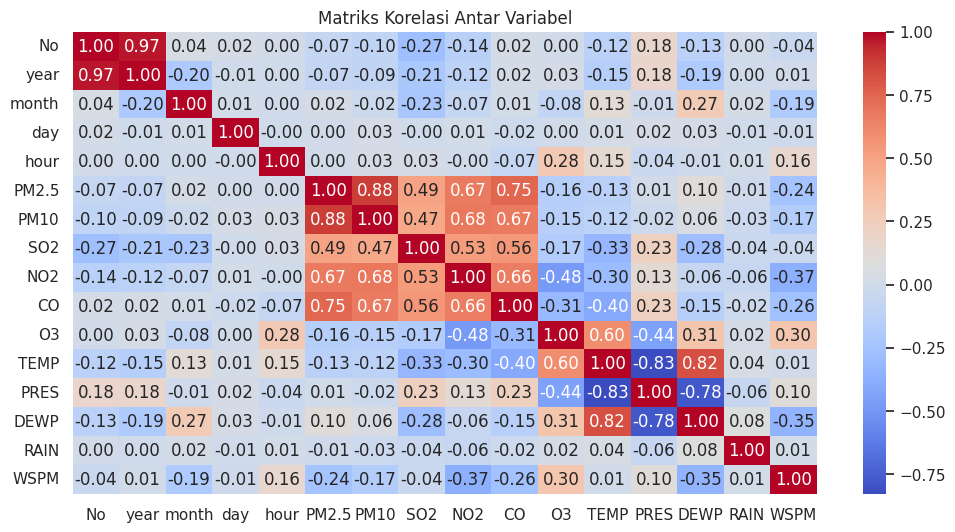

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Statistik Deskriptif
print(data_air.describe())

# 2. Distribusi PM2.5
plt.figure(figsize=(8,5))
sns.histplot(data_air["PM2.5"], bins=30, kde=True, color="blue")
plt.title("Distribusi PM2.5")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Frekuensi")
plt.show()

# 3. Tren Musiman PM2.5
plt.figure(figsize=(10,5))
sns.boxplot(x=data_air["month"], y=data_air["PM2.5"], palette="Blues")
plt.title("Distribusi PM2.5 per Bulan")
plt.xlabel("Bulan")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

# 4. Korelasi antar Variabel
# Select only numerical features for correlation calculation
numerical_features = data_air.select_dtypes(include=np.number)

plt.figure(figsize=(12,6))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

**Insight :**
* Polusi udara mengalami penurunan dari 2013 hingga 2016, tetapi kembali meningkat pada 2017. Distribusi PM2.5 menunjukkan mayoritas nilai rendah dengan beberapa lonjakan ekstrem. Konsentrasi PM2.5 cenderung lebih tinggi pada bulan Desember hingga Februari, kemungkinan akibat kondisi atmosfer yang memperangkap polutan. Korelasi yang kuat antara PM2.5 dengan PM10, CO, dan NO2 menunjukkan bahwa sumber utama polusi berasal dari kendaraan dan aktivitas industri. Suhu yang lebih tinggi serta hujan memiliki dampak positif dalam mengurangi konsentrasi PM2.5, membantu membersihkan udara secara alami.

# Visualization & Explanatory Analisis

# Pertanyaan 1 : Bagaimana tren tahunan dari kadar PM2.5 di stasiun Wanliu?

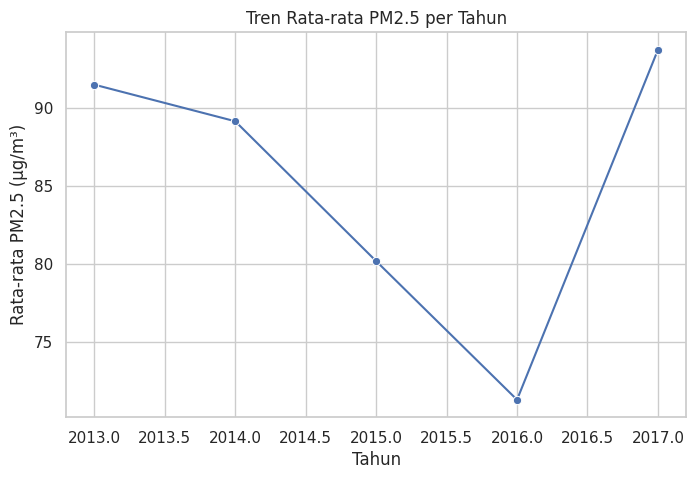

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung rata-rata PM2.5 per tahun
pm25_trend = data_air.groupby("year")["PM2.5"].mean()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.lineplot(x=pm25_trend.index, y=pm25_trend.values, marker='o', color='b')

# Label dan judul
plt.xlabel("Tahun")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")
plt.title("Tren Rata-rata PM2.5 per Tahun")
plt.grid(True)
plt.show()


**Insight :**
Berdasarkan tren tahunan konsentrasi PM2.5 dari tahun 2013 hingga 2017, terlihat bahwa terjadi penurunan signifikan dari tahun 2013 hingga 2016, mencapai titik terendah pada tahun 2016. Namun, pada tahun 2017, terjadi lonjakan tajam dalam rata-rata konsentrasi PM2.5. Hal ini dapat mengindikasikan adanya faktor eksternal, seperti perubahan kebijakan lingkungan, peningkatan aktivitas industri, atau kondisi cuaca yang berbeda, yang menyebabkan peningkatan polusi udara pada tahun tersebut.

# Pertanyaan 2 : Apakah ada hubungan antara suhu (TEMP) dan kadar PM2.5?

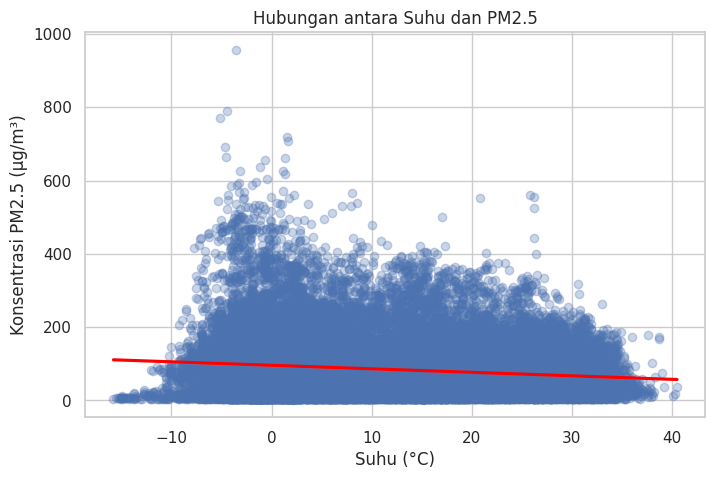

Korelasi antara Suhu dan PM2.5: -0.13


In [ ]:
# Scatter plot dengan regresi
plt.figure(figsize=(8, 5))
sns.regplot(x=data_air["TEMP"], y=data_air["PM2.5"], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

# Label dan judul
plt.xlabel("Suhu (°C)")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.title("Hubungan antara Suhu dan PM2.5")
plt.grid(True)
plt.show()

# KORELASI
corr = data_air["TEMP"].corr(data_air["PM2.5"])
print(f"Korelasi antara Suhu dan PM2.5: {corr:.2f}")

**Insight :**
Korelasi antara suhu (TEMP) dan kadar PM2.5 menunjukkan hubungan negatif yang sangat lemah dengan nilai -0.13. Hal ini berarti peningkatan suhu tidak memiliki pengaruh signifikan terhadap penurunan kadar PM2.5. Dari scatter plot, terlihat bahwa konsentrasi PM2.5 cenderung lebih tinggi pada suhu rendah, tetapi tetap bervariasi meskipun suhu meningkat hingga 40°C. Pola ini menunjukkan bahwa suhu bukan satu-satunya faktor yang mempengaruhi PM2.5, sehingga faktor lain seperti kelembaban, kecepatan angin, curah hujan, dan sumber polusi juga perlu dipertimbangkan.

In [ ]:
import pandas as pd
data_air.to_csv("all_data.csv", index=False)

# CONCLUSION

Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa:  

1. **Tren PM2.5 dari Tahun ke Tahun**  
   Konsentrasi rata-rata PM2.5 mengalami penurunan dari tahun 2013 hingga 2016, tetapi meningkat tajam pada tahun 2017. Ini menunjukkan bahwa kualitas udara sempat membaik sebelum akhirnya memburuk kembali.  

2. **Distribusi PM2.5**  
   Konsentrasi PM2.5 menunjukkan distribusi yang tidak merata, dengan mayoritas nilai berada pada level rendah hingga sedang, tetapi terdapat beberapa nilai ekstrem (outlier) yang sangat tinggi.  

3. **Hubungan antara Suhu dan PM2.5**  
   Terdapat hubungan negatif yang sangat lemah antara suhu (TEMP) dan kadar PM2.5 dengan korelasi sebesar -0.13. Ini menunjukkan bahwa peningkatan suhu tidak serta-merta menyebabkan penurunan PM2.5 secara signifikan, dan ada faktor lain yang lebih berpengaruh terhadap polusi udara.  

Secara keseluruhan, kualitas udara bervariasi berdasarkan waktu dan dipengaruhi oleh berbagai faktor selain suhu. Oleh karena itu, untuk memahami pola polusi udara lebih lanjut, perlu mempertimbangkan faktor lingkungan lainnya seperti kelembaban, kecepatan angin, curah hujan, dan sumber emisi polutan.

In [ ]:
!pip freeze > requirements.txt

In [ ]:
from google.colab import files
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>